# Image (2D) Example

In the following we will register two images to learn how to apply torchreg to normal (2D) image data.

If you stumble across something weird, have a look into minimal.ipynb first. Maybe it's explained there!

In [1]:
import sys
sys.path.append('..')
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchreg import AffineRegistration

In [2]:
def image_to_tensor(image):
    array = np.array(image, dtype=np.float32)
    array = array[:, :, :3]
    array /= 255
    return torch.from_numpy(array).permute(2, 0, 1)


def tensor_to_image(tensor):
    array = tensor.permute(1, 2, 0).numpy()
    array *= 255
    array = array.astype(np.uint8)
    return Image.fromarray(array)

Load small and big alice from .png files

In [3]:
img_moving = Image.open('alice_big.jpg')
img_static = Image.open('alice_small.jpg')

moving = image_to_tensor(img_moving)
static = image_to_tensor(img_static)

Plot before registration

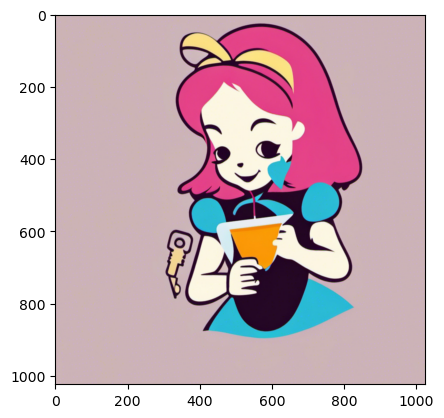

In [4]:
plt.imshow(moving.permute(1, 2, 0));

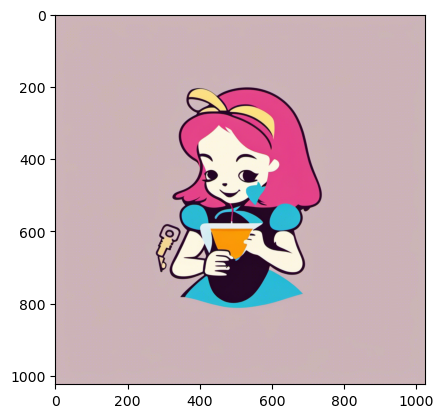

In [5]:
plt.imshow(static.permute(1, 2, 0));

Do registration

In [6]:
reg = AffineRegistration(is_3d=False)

moved = reg(moving[None], static[None])
moved = moved[0]

Shape: [1, 3, 256, 256]; Dissimiliarity: 0.0007600334356538951: 100%|██████████| 500/500 [00:01<00:00, 298.95it/s]
Shape: [1, 3, 512, 512]; Dissimiliarity: 0.00018645920499693602: 100%|██████████| 100/100 [00:01<00:00, 93.18it/s]


Look at result

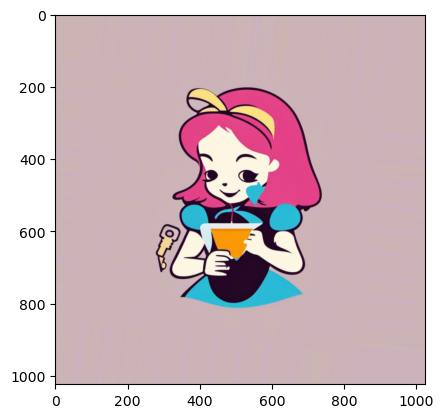

In [7]:
plt.imshow(moved.permute(1, 2, 0));

Looks great! Convert tensor back to image and save it.

In [9]:
img_moved = tensor_to_image(moved)
img_moved.save('alice_moved.jpg')